In [1]:
%matplotlib notebook
from scipy import sparse 
from scipy.sparse.linalg import lsqr, cg, eigsh
import matplotlib.pyplot as plt 
import argparse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import cv2
import heapq
import random
import copy
import sys
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import pandas as pd
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
from scipy import genfromtxt
from sklearn.cluster import SpectralClustering
import matplotlib.patches as mpatches
import importlib
import time

import hks
import saiteki as h

In [2]:
importlib.reload(hks)
importlib.reload(h)
from hks import *

In [3]:
h.hkscolor('poseobj/model1frame0501.obj',"result/syasiinn",1000)

(array([[3.],
        [3.],
        [3.],
        ...,
        [3.],
        [3.],
        [3.]]), array([[ 0.158104, -0.458127, -0.049582],
        [ 0.15308 , -0.438416, -0.025406],
        [ 0.157049, -0.457659, -0.020688],
        ...,
        [-0.195381, -0.286057, -0.341413],
        [-0.197075, -0.282562, -0.338744],
        [-0.192686, -0.28979 , -0.32917 ]]), array([   0,  495, 1158, 1884, 2262, 2538], dtype=int32))

In [77]:
#骨格の長さを計算する関数
def bonelen(trc):
    joint = trc[:,1:]
    #配列作り
    a = np.arange(17)
    a[4] = 1
    a[7] = 1
    a[10] = 1
    a[13] = 0
    a[14] = 0
    a[-2:] -=1
    c = np.zeros(17*3,dtype='int32')
    c[::3] = a*3
    c[1::3] =a*3+1
    c[2::3] =a*3+2
    jointbox = (joint[:,1*3:]-joint[:,c])**2
    jointbox = np.reshape(jointbox,(len(jointbox),17,3))
    jointlen = np.sum(jointbox,axis=2)**0.5
    return jointlen

In [99]:
#trcから骨格長の計算
#a = pd.read_csv('trc/model1.trc',delim_whitespace=True)
for i in lst:
    a = pd.read_table('trc/model{}.trc'.format(i),header=4)
    b = a.values
    trc = b[:,:-1]
    length = bonelen(trc)
#保存
#    np.savetxt("trc/bonelength{}.csv".format(i),length,delimiter=',')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


In [376]:
#読み込み
bl1 = np.loadtxt("trc/bonelength1.csv",delimiter=',')
bl2 = np.loadtxt("trc/bonelength2.csv",delimiter=',')
bl3 = np.loadtxt("trc/bonelength3.csv",delimiter=',')
bl4 = np.loadtxt("trc/bonelength4.csv",delimiter=',')
lst = [1,2,3,4]
print(np.shape(bl1))

(4663, 17)


In [377]:
#結果の割合
#結果の割合

#ベースモデルを作る
base1 = np.mean(bl1[500:1100],axis=0)
base2 = np.mean(bl2[1200:1800],axis=0)
base3 = np.mean(bl3[600:1200],axis=0)
base4 = np.mean(bl4[600:1200],axis=0)
#テストモデルを作る
test1 = np.mean(np.reshape(bl1[3300:4500],(20,60,17)),axis=1)
test2 = np.mean(np.reshape(bl2[1800:3000],(20,60,17)),axis=1)
test3 = np.mean(np.reshape(bl3[1300:2500],(20,60,17)),axis=1)
test4 = np.mean(np.reshape(bl4[1300:2500],(20,60,17)),axis=1)
for name in lst:
    exec("ansbox%d =np.zeros((20,4))"%(name))
    for i,j in enumerate(lst):
#普通の結果
        exec("ansbox%d[:,i] = np.sum(np.abs(test%d-base%d),axis=1)"%(name,name,j))
    exec("indbox%d = np.argsort(ansbox%d,axis=1)+1"%(name,name))
#print(ansbox1)
#print(ansbox2)
#print(ansbox3)
#print(ansbox4)
#print(np.sum(indbox1[:,0] ==1)/20)
#print(np.sum(indbox2[:,0] ==2)/20)
#print(np.sum(indbox3[:,0] ==3)/20)
#print(np.sum(indbox4[:,0] ==4)/20)
#print(indbox1)
#print(indbox2)
#print(indbox3)
#print(indbox4)


ここからモデルを用いたやつをおこなう

In [6]:
importlib.reload(hks)
importlib.reload(h)
from hks import *
#(a,b,c) = h.hkscolor('doudemoii/000_40.obj','doudemoii/aaa40',1000)
(a,b,c) = h.hkscolor('poseobj/model2frame1201.obj','result/',700)
#(a,b,c) = h.hkscolor('objdata/model1.obj','result/5baiaa',700)


In [7]:
h.solve_hc(2,1211)

array([[0.11686992, 1.25841072],
       [0.14306881, 1.44658504],
       [0.05943012, 0.9151811 ],
       [0.10660743, 1.17657351],
       [0.01472769, 0.4435862 ],
       [0.0143902 , 0.43599117],
       [0.01139116, 0.3837112 ],
       [0.14253372, 1.39371447],
       [0.08654482, 1.39885169],
       [0.00590827, 0.28691902],
       [0.01263343, 0.42479448],
       [0.0061049 , 0.2922138 ],
       [0.0122722 , 0.41845454]])

In [186]:
##ベースデータ
##まとめて保存
#h.matome_hc(500 ,60,1)
#h.matome_hc(1200,60,2)
#h.matome_hc(600 ,60,3)
#h.matome_hc(600 ,60,4)

In [207]:
##ベースデータ
##まとめて保存
#sframe = 500
#ran = 60
#for i in range(ran):
#    frame = sframe +i*10+1
#    np.savetxt("hks/areamodel{:d}frame{:04d}.csv".format(1,frame),h.solve_hc(1,frame)[:,0],delimiter=',')
#sframe = 1200
#for i in range(ran):
#    frame = sframe +i*10+1
#    np.savetxt("hks/areamodel{:d}frame{:04d}.csv".format(2,frame),h.solve_hc(2,frame)[:,0],delimiter=',')
#sframe = 600
#for i in range(ran):
#    frame = sframe +i*10+1
#    np.savetxt("hks/areamodel{:d}frame{:04d}.csv".format(3,frame),h.solve_hc(3,frame)[:,0],delimiter=',')
#for i in range(ran):
#    frame = sframe +i*10+1
#    np.savetxt("hks/areamodel{:d}frame{:04d}.csv".format(4,frame),h.solve_hc(4,frame)[:,0],delimiter=',')

In [374]:
##テストデータ
##まとめて保存
h.matome_hc(3300 ,20,1)
h.matome_hc(1800 ,20,2)
h.matome_hc(1300 ,20,3)
h.matome_hc(1300 ,20,4)
sframe =3300 
ran = 20
for i in range(ran):
    frame = sframe +i*10+1
    np.savetxt("hks/areamodel{:d}frame{:04d}.csv".format(1,frame),h.solve_hc(1,frame)[:,0],delimiter=',')
sframe = 1800
for i in range(ran):
    frame = sframe +i*10+1
    np.savetxt("hks/areamodel{:d}frame{:04d}.csv".format(2,frame),h.solve_hc(2,frame)[:,0],delimiter=',')
sframe = 1300
for i in range(ran):
    frame = sframe +i*10+1
    np.savetxt("hks/areamodel{:d}frame{:04d}.csv".format(3,frame),h.solve_hc(3,frame)[:,0],delimiter=',')
for i in range(ran):
    frame = sframe +i*10+1
    np.savetxt("hks/areamodel{:d}frame{:04d}.csv".format(4,frame),h.solve_hc(4,frame)[:,0],delimiter=',')

45.0%%

KeyboardInterrupt: 

In [ ]:
def alsort(array):
    alsort = np.zeros(11)
    alsort[:2] = np.sort(array[:2])
    alsort[2:6] = np.sort(array[2:6])
    alsort[6] = np.max(array[6:9])
    alsort[7:] = np.sort(array[9:])
    return alsort

In [ ]:
sframe = 500
ran = 60
for i in range(ran):
    frame = sframe +i*10+1
    exec("alm%df%04d = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(1,frame),delimiter=','))"%(1,frame))
sframe = 1200
for i in range(ran):
    frame = sframe +i*10+1
    exec("alm%df%04d = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(2,frame),delimiter=','))"%(2,frame))
sframe = 600
for i in range(ran):
    frame = sframe +i*10+1
    exec("alm%df%04d = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(3,frame),delimiter=','))"%(3,frame))
for i in range(ran):
    frame = sframe +i*10+1
    exec("alm%df%04d = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(4,frame),delimiter=','))"%(4,frame))
sframe = 3300
ran = 20
for i in range(ran):
    frame = sframe +i*10+1
    exec("alm%df%04d = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(1,frame),delimiter=','))"%(1,frame))
sframe = 1800
for i in range(ran):
    frame = sframe +i*10+1
    exec("alm%df%04d = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(2,frame),delimiter=','))"%(2,frame))
sframe = 1300
for i in range(ran):
    frame = sframe +i*10+1
    exec("alm%df%04d = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(3,frame),delimiter=','))"%(3,frame))
for i in range(ran):
    frame = sframe +i*10+1
    exec("alm%df%04d = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(4,frame),delimiter=','))"%(4,frame))

In [ ]:
ran = 60
sframe1 = 500
sframe2 =1200
sframe3 = 600
sframe4 = 600
al1b = np.zeros((ran,11))
al2b = np.zeros((ran,11))
al3b = np.zeros((ran,11))
al4b = np.zeros((ran,11))
for i in range(ran):
    frame1 = sframe1 +i*10+1
    frame2 = sframe2 +i*10+1
    frame3 = sframe3 +i*10+1
    frame4 = sframe4 +i*10+1
    al1b[i] = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(1,frame1),delimiter=','))
    al2b[i] = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(2,frame2),delimiter=','))
    al3b[i] = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(3,frame3),delimiter=','))
    al4b[i] = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(4,frame4),delimiter=','))
ab1 = np.mean(al1b,axis=0)
ab2 = np.mean(al2b,axis=0)
ab3 = np.mean(al3b,axis=0)
ab4 = np.mean(al4b,axis=0)
ran = 20
sframe1 =3300
sframe2 =1800
sframe3 =1300
sframe4 =1300
al1t = np.zeros((ran,11))
al2t = np.zeros((ran,11))
al3t = np.zeros((ran,11))
al4t = np.zeros((ran,11))
for i in range(ran):
    frame1 = sframe1 +i*10+1
    frame2 = sframe2 +i*10+1
    frame3 = sframe3 +i*10+1
    frame4 = sframe4 +i*10+1
    al1t[i] = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(1,frame1),delimiter=','))
    al2t[i] = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(2,frame2),delimiter=','))
    al3t[i] = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(3,frame3),delimiter=','))
    al4t[i] = alsort(np.loadtxt('hks/areamodel{:d}frame{:04d}.csv'.format(4,frame4),delimiter=','))

In [375]:
#結果の割合

#ベースモデルを作る
base1 = np.mean(bl1[500:1100],axis=0)
base2 = np.mean(bl2[1200:1800],axis=0)
base3 = np.mean(bl3[600:1200],axis=0)
base4 = np.mean(bl4[600:1200],axis=0)
#テストモデルを作る
test1 = np.mean(np.reshape(bl1[3300:4500],(20,60,17)),axis=1)
test2 = np.mean(np.reshape(bl2[1800:3000],(20,60,17)),axis=1)
test3 = np.mean(np.reshape(bl3[1300:2500],(20,60,17)),axis=1)
test4 = np.mean(np.reshape(bl4[1300:2500],(20,60,17)),axis=1)
for name in lst:
    exec("ansbox%d =np.zeros((20,4))"%(name))
    for i,j in enumerate(lst):
#普通の結果
        exec("ansbox%d[:,i] = np.sum(np.abs(test%d-base%d),axis=1)"%(name,name,j))
    exec("indbox%d = np.argsort(ansbox%d,axis=1)+1"%(name,name))
#print(ansbox1)
#print(ansbox2)
#print(ansbox3)
#print(ansbox4)
#print(np.sum(indbox1[:,0] ==1)/20)
#print(np.sum(indbox2[:,0] ==2)/20)
#print(np.sum(indbox3[:,0] ==3)/20)
#print(np.sum(indbox4[:,0] ==4)/20)
#print(indbox1)
#print(indbox2)
#print(indbox3)
#print(indbox4)


NameError: name 'test0' is not defined

In [379]:
print(np.shape(ansbox))

(20, 4)


In [395]:
#mul =np.zeros((20,4)) 
#mul = np.array([1,0.75,0.5,0.25])
#合体させたもの
ma = np.max(ansbox1,axis=1)
mi = np.max(ansbox1,axis=1)
mma = np.max(a1,axis=1)
mmi = np.max(a1,axis=1)
result = np.zeros((20,4))
for i in range(20):
#    result[i] = (ansbox1[i]-mi[i])/(ma[i]-mi[i])
#    result[i] += (a1[i]-mmi[i])/(mma[i]-mmi[i])
    result[i] = (ansbox1[i]-mi[i])/(mi[i])
    result[i] += (a1[i]-mmi[i])/(mmi[i])
print(np.argsort(result,axis=1))

ma = np.max(ansbox2,axis=1)
mi = np.max(ansbox2,axis=1)
mma = np.max(a2,axis=1)
mmi = np.max(a2,axis=1)
result = np.zeros((20,4))
for i in range(20):
    result[i] = (ansbox2[i]-mi[i])/(mi[i])
    result[i] += (a2[i]-mmi[i])/(mmi[i])
print(np.argsort(result,axis=1))


ma = np.max(ansbox3,axis=1)
mi = np.max(ansbox3,axis=1)
mma = np.max(a3,axis=1)
mmi = np.max(a3,axis=1)
result = np.zeros((20,4))
for i in range(20):
    result[i] = (ansbox3[i]-mi[i])/(mi[i])
    result[i] += (a3[i]-mmi[i])/(mmi[i])
print(np.argsort(result,axis=1))

ma = np.max(ansbox4,axis=1)
mi = np.max(ansbox4,axis=1)
mma = np.max(a4,axis=1)
mmi = np.max(a4,axis=1)
result = np.zeros((20,4))
for i in range(20):
#    result[i] = (ansbox1[i]-mi[i])/(ma[i]-mi[i])
#    result[i] += (a1[i]-mmi[i])/(mma[i]-mmi[i])
    result[i] = (ansbox4[i]-mi[i])/(mi[i])
    result[i] += (a4[i]-mmi[i])/(mmi[i])
print(np.argsort(result,axis=1))


[[0 1 3 2]
 [0 1 2 3]
 [0 1 2 3]
 [1 0 3 2]
 [1 3 0 2]
 [0 1 2 3]
 [0 2 1 3]
 [0 1 2 3]
 [1 0 3 2]
 [1 0 3 2]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 2 1 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 1 2 3]
 [1 0 2 3]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 2 3]
 [1 0 2 3]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 2 3]
 [1 0 2 3]
 [1 0 3 2]
 [1 0 3 2]
 [1 3 0 2]
 [1 3 0 2]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]]
[[3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [1 3 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]]


In [296]:
#結果の割合

#ベースモデルを作る
base1 = np.mean(bl1[500:1100],axis=0)
base2 = np.mean(bl2[1200:1800],axis=0)
base3 = np.mean(bl3[600:1200],axis=0)
base4 = np.mean(bl4[600:1200],axis=0)
#テストモデルを作る
test1 = np.mean(np.reshape(bl1[3300:4500],(20,60,17)),axis=1)
test2 = np.mean(np.reshape(bl2[1800:3000],(20,60,17)),axis=1)
test3 = np.mean(np.reshape(bl3[1300:2500],(20,60,17)),axis=1)
test4 = np.mean(np.reshape(bl4[1300:2500],(20,60,17)),axis=1)
for name in lst:
    exec("ansbox%d =np.zeros((20,4))"%(name))
    for i,j in enumerate(lst):
#普通の結果
        exec("ansbox%d[:,i] = np.sum(np.abs(test%d-base%d),axis=1)"%(name,name,j))
    exec("indbox%d = np.argsort(ansbox%d,axis=1)+1"%(name,name))
#print(ansbox1)
#print(ansbox2)
#print(ansbox3)
#print(ansbox4)
#print(np.sum(indbox1[:,0] ==1)/20)
#print(np.sum(indbox2[:,0] ==2)/20)
#print(np.sum(indbox3[:,0] ==3)/20)
#print(np.sum(indbox4[:,0] ==4)/20)
print(indbox1)
print(indbox2)
print(indbox3)
print(indbox4)


[[2 1 4 3]
 [1 2 3 4]
 [1 3 2 4]
 [2 4 1 3]
 [2 4 1 3]
 [1 3 2 4]
 [1 3 2 4]
 [1 3 2 4]
 [2 4 1 3]
 [2 4 1 3]
 [1 3 2 4]
 [1 3 2 4]
 [1 3 2 4]
 [1 3 2 4]
 [1 2 3 4]
 [1 3 2 4]
 [1 3 2 4]
 [1 3 2 4]
 [1 3 2 4]
 [1 2 3 4]]
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [2 1 4 3]
 [2 1 4 3]
 [2 1 3 4]
 [2 1 3 4]
 [2 1 3 4]
 [2 1 4 3]
 [2 1 4 3]
 [2 1 3 4]
 [2 1 3 4]
 [2 4 1 3]
 [2 4 1 3]
 [2 4 1 3]
 [2 4 1 3]
 [2 4 1 3]
 [1 3 2 4]
 [1 3 2 4]
 [1 3 2 4]]
[[3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [1 3 2 4]
 [3 1 2 4]
 [3 1 2 4]
 [3 1 2 4]]
[[4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [2 4 1 3]
 [2 4 1 3]
 [2 4 1 3]
 [4 2 1 3]
 [4 2 1 3]
 [4 2 1 3]]


In [380]:
print(np.shape(al1t-ab1))
ansbox = np.zeros((20,4))
ansbox[:,0] = np.sum(np.abs(al1t-ab1),axis=1)
ansbox[:,1] = np.sum(np.abs(al1t-ab2),axis=1)
ansbox[:,2] = np.sum(np.abs(al1t-ab3),axis=1)
ansbox[:,3] = np.sum(np.abs(al1t-ab4),axis=1)
print(np.argsort(ansbox,axis=1))
a1 = ansbox
#a1 = np.argsort(ansbox,axis=1)+1
ansbox = np.zeros((20,4))
ansbox[:,0] = np.sum(np.abs(al2t-ab1),axis=1)
ansbox[:,1] = np.sum(np.abs(al2t-ab2),axis=1)
ansbox[:,2] = np.sum(np.abs(al2t-ab3),axis=1)
ansbox[:,3] = np.sum(np.abs(al2t-ab4),axis=1)
print(np.argsort(ansbox,axis=1))
a2 = ansbox
#a2 = np.argsort(ansbox,axis=1)+1

ansbox = np.zeros((20,4))
ansbox[:,0] = np.sum(np.abs(al3t-ab1),axis=1)
ansbox[:,1] = np.sum(np.abs(al3t-ab2),axis=1)
ansbox[:,2] = np.sum(np.abs(al3t-ab3),axis=1)
ansbox[:,3] = np.sum(np.abs(al3t-ab4),axis=1)
print(np.argsort(ansbox,axis=1))
a3 = ansbox
#a3 = np.argsort(ansbox,axis=1)+1

ansbox = np.zeros((20,4))
ansbox[:,0] = np.sum(np.abs(al4t-ab1),axis=1)
ansbox[:,1] = np.sum(np.abs(al4t-ab2),axis=1)
ansbox[:,2] = np.sum(np.abs(al4t-ab3),axis=1)
ansbox[:,3] = np.sum(np.abs(al4t-ab4),axis=1)
print(np.argsort(ansbox,axis=1))
a4 = ansbox
#a4 = np.argsort(ansbox,axis=1)+1


(20, 11)
[[0 1 3 2]
 [0 1 2 3]
 [0 1 3 2]
 [0 1 3 2]
 [0 1 3 2]
 [0 1 2 3]
 [0 2 1 3]
 [0 1 3 2]
 [0 1 3 2]
 [0 1 3 2]
 [0 1 3 2]
 [0 1 3 2]
 [0 1 3 2]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 3 2]
 [0 1 3 2]
 [0 1 3 2]
 [0 1 3 2]
 [0 1 3 2]]
[[0 1 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [0 1 2 3]
 [0 1 2 3]
 [1 0 3 2]
 [0 1 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [0 1 2 3]
 [0 1 2 3]
 [1 0 3 2]
 [0 1 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 2 3]
 [0 1 2 3]
 [0 1 3 2]]
[[2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]
 [2 0 1 3]]
[[3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [3 1 0 2]
 [1 0 3 2]
 [3 1 0 2]]


In [397]:
#骨格の長さを計算する関数
#def bonelen(trc):
def bonelen(trc):
    joint = trc[:,1:]
    #配列作り
    a = np.arange(17)
    a[4] = 1
    a[7] = 1
    a[10] = 1
    a[13] = 0
    a[14] = 0
    a[-2:] -=1
    c = np.zeros(17*3,dtype='int32')
    c[::3] = a*3
    c[1::3] =a*3+1
    c[2::3] =a*3+2
    jointbox = (joint[:,1*3:]-joint[:,c])**2
    jointbox = np.reshape(jointbox,(len(jointbox),17,3))
    jointlen = np.sum(jointbox,axis=2)**0.5
    return jointlen
def jointvar(trc):
    joint = trc[:,1:]
    jmean = np.mean(joint,axis=0)
    jointbox = (joint-jmean)**2
    jointbox = np.reshape(jointbox,(len(jointbox),18,3))
    jointlen = np.sum(jointbox,axis=2)**0.5
    return np.var(jointlen,axis=0)

In [399]:
lst = [500,1200,600,600]
#basevar = np.zeros((4,18))
basevar = np.zeros((4,18))
for i in range(4):
    a = pd.read_table('trc/model{}.trc'.format(i+1),header=4)
    b = a.values
    trc = b[lst[i]:lst[i]+600,:-1]
    basevar[i] = jointvar(trc)
lst = [3300,1800,1300,1300]
#testvar = np.zeros((4,20,18))
testvar = np.zeros((4,20,18))
for i in range(4):
    #temp = np.zeros((20,18))
    temp = np.zeros((20,18))
    a = pd.read_table('trc/model{}.trc'.format(i+1),header=4)
    b = a.values
    for j in range(20):
        trc = b[lst[i]+60*j:lst[i]+60*(j+1),:-1]
        temp[j] = jointvar(trc)
    testvar[i] = temp

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  from ipykernel import kernelapp as app


In [400]:
ansbox = np.zeros((20,4))
for i in range(4):
    ansbox[:,i] = np.mean(np.abs(testvar[0]-basevar[i]),axis=1)
print(np.argsort(ansbox,axis=1))
for i in range(4):
    ansbox[:,i] = np.mean(np.abs(testvar[1]-basevar[i]),axis=1)
print(np.argsort(ansbox,axis=1))
for i in range(4):
    ansbox[:,i] = np.mean(np.abs(testvar[2]-basevar[i]),axis=1)
print(np.argsort(ansbox,axis=1))
for i in range(4):
    ansbox[:,i] = np.mean(np.abs(testvar[3]-basevar[i]),axis=1)

[[1 0 3 2]
 [3 0 1 2]
 [1 0 3 2]
 [3 0 1 2]
 [1 0 3 2]
 [1 3 0 2]
 [1 0 3 2]
 [1 3 0 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 3 0 2]
 [1 0 3 2]
 [1 3 0 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 3 0 2]]
[[1 3 0 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 3 0 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 3 0 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 3 0 2]
 [1 0 3 2]
 [1 0 3 2]
 [1 3 0 2]]
[[1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]
 [1 3 0 2]]


In [354]:
print(basevar[0])
print(testvar[0,0])
print(testvar[0,1])

[ 360.01517655  339.26015018  524.60861166  783.21284382 4758.46412744
  477.87101145 1396.21379885 5809.54452859  365.90825979 3177.17263043
 8620.42004916  350.04102071 4228.75117833 8306.88422035  402.47305527
  390.81622641  363.46167826  353.30572158]
[   60.30523777    33.98201319   108.18046781   269.49683476
  1715.522122      81.36140883  1353.61106243  6266.65576495
    71.855858    1593.60341366  4426.07204802   168.39919484
  1039.8553375  10697.16168757    67.1905786     66.85218064
    63.86455353    52.21292472]
[  44.2602712    44.13886475   31.31301411  650.05462069 2344.13135282
   68.76356395 1271.07971304 8270.10072938   74.8628358   792.55473652
 7432.37999651   88.11582428 2719.55697565 6967.40145148   44.56262447
   41.19066497   40.13063649   28.86125874]


In [114]:
def colorhks(inputfile, output, t=10, neigvecs=200, save = True):
    (VPos, VColors, ITris) = loadOffFile(inputfile)
    #拡大してみた
    VPos = VPos*2
    vnum = len(VPos)
    neigvecs = min(VPos.shape[0], neigvecs)
    hks = getHKS(VPos, ITris, neigvecs, np.array([t]))
    if save:
        outputfile = output + 'time_{0}.off'.format(t)
        saveHKSColors(outputfile, VPos, hks[:, 0], ITris)
    return hks 

<IPython.core.display.Javascript object>


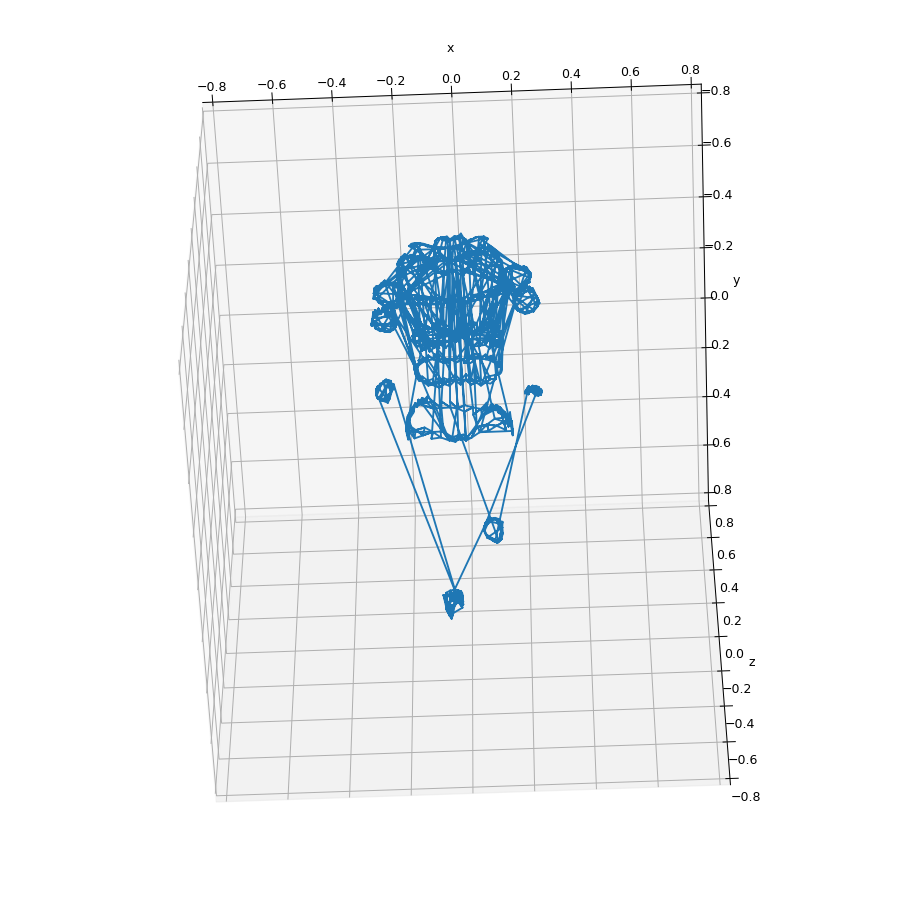

In [181]:
#fig = plt.figure()
fig = plt.figure(figsize=(10,10),dpi=60)
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xlim(-0.8,0.8)
ax.set_ylim(-0.8,0.8)
ax.set_zlim(-0.8,0.8)

#name = 'model1'
#n = 18
#join = np.loadtxt('joint/joint'+name+'.csv',delimiter=',')
#ax.scatter(join[n,0],join[n,1],join[n,2],"o",color='red')
#vpos = np.loadtxt('verts/verts'+name+'.csv',delimiter=',')
#ax.plot(vpos[:,0],vpos[:,1],vpos[:,2],",")
#handles, labels = ax.get_legend_handles_labels()
ax.plot(linevpos[:,0],linevpos[:,1],linevpos[:,2])

In [102]:
#もう使わない（
##fig = plt.figure()
#fig = plt.figure(figsize=(10,10),dpi=60)
#ax = Axes3D(fig)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_zlabel("z")
#ax.set_xlim(-0.8,0.8)
#ax.set_ylim(-0.8,0.8)
#ax.set_zlim(-0.8,0.8)
#
#name = 'model1'
#n = 18
#join = np.loadtxt('joint/joint'+name+'.csv',delimiter=',')
#ax.scatter(join[n,0],join[n,1],join[n,2],"o",color='red')
#vpos = np.loadtxt('verts/verts'+name+'.csv',delimiter=',')
#ax.plot(vpos[:,0],vpos[:,1],vpos[:,2],",")
#handles, labels = ax.get_legend_handles_labels()

In [103]:
##もう使わなi
##fig = plt.figure()
#fig = plt.figure(figsize=(10,10),dpi=60)
#ax = Axes3D(fig)
#ax.set_xlabel("x")
#ax.set_ylabel("y")
#ax.set_zlabel("z")
##ax.set_xlim(-0.8,0.8)
##ax.set_ylim(-0.8,0.8)
##ax.set_zlim(-0.8,0.8)
#
#name = 'model1'
#joint1 = np.loadtxt('joint/joint'+name+'.csv',delimiter=',')
#lst =[14,12,8,7,6,9,10,11,2,1,0,3,4,5,16,15,18,17,13]
#lst0 = [0,2,1]
#lst1 = np.array([1,-1,1])
#joint1 = joint1[lst]
#joint1 = joint1[:,lst0]*lst1
#
#a = pd.read_table('trc/model1.trc',header=4)
#b = a.values
#c = b[:,:-1]
##llist = [1,0,2]
##llist2 = [1,1,-1]
##joint = c[1000,1:].copy()
##joint = np.reshape(joint,[18,3])*0.001
##joint = joint[:,llist]*llist2
#
#
#
#joint = c[1000,1:].copy()
#joint = np.reshape(joint,[18,3])*0.001
#lis = [1,-1,1]
#joint *=lis
#
#nosediff = joint[0] -joint1[0]
#joint1 = joint1 +nosediff
#
#
#
#lim = np.abs(np.max(joint,axis=0)-np.min(joint,axis=0))
#wid = np.max(lim)*0.5
#mea = np.mean(joint,axis=0)
#ax.set_xlim(mea[0]+wid,mea[0]-wid)
#ax.set_ylim(mea[1]+wid,mea[1]-wid)
#ax.set_zlim(mea[2]+wid,mea[2]-wid)
#ax.plot(joint[:,0],joint[:,1],joint[:,2],"o",color='red',alpha = 0.5)
#ax.plot(joint1[:,0],joint1[:,1],joint1[:,2],"o",color='blue')

In [310]:
#結果の割合

#ベースモデルを作る
base1 = np.mean(bl1[500:1100],axis=0)
base2 = np.mean(bl2[1200:1800],axis=0)
base3 = np.mean(bl3[600:1200],axis=0)
base4 = np.mean(bl4[600:1200],axis=0)
#テストモデルを作る
test1 = np.mean(np.reshape(bl1[3300:4500],(20,60,17)),axis=1)
test2 = np.mean(np.reshape(bl2[1800:3000],(20,60,17)),axis=1)
test3 = np.mean(np.reshape(bl3[1300:2500],(20,60,17)),axis=1)
test4 = np.mean(np.reshape(bl4[1300:2500],(20,60,17)),axis=1)
for name in lst:
    exec("ansbox%d =np.zeros((20,4))"%(name))
    for i,j in enumerate(lst):
#普通の結果
        exec("ansbox%d[:,i] = np.sum(np.abs(test%d-base%d),axis=1)"%(name,name,j))
    exec("indbox%d = np.argsort(ansbox%d,axis=1)+1"%(name,name))
#print(ansbox1)
#print(ansbox2)
#print(ansbox3)
#print(ansbox4)
#print(np.sum(indbox1[:,0] ==1)/20)
#print(np.sum(indbox2[:,0] ==2)/20)
#print(np.sum(indbox3[:,0] ==3)/20)
#print(np.sum(indbox4[:,0] ==4)/20)
#print(indbox1)
#print(indbox2)
#print(indbox3)
#print(indbox4)
